In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import linalg
data1=pd.read_csv(r'data_new.csv',header=None)
data1.head(5)

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [67]:
data2=data1.loc[:,1:]

In [68]:
data2.corr(method='spearman')

,1,2,3,4,5,6,7,8
1,1.000000,0.983319,0.888206,0.972633,0.956830,0.952658,0.947926,0.604385
2,0.983319,1.000000,0.895705,0.971324,0.950472,0.948391,0.954149,0.622895
3,0.888206,0.895705,1.000000,0.915985,0.874196,0.900587,0.921224,0.657716
4,0.972633,0.971324,0.915985,1.000000,0.977060,0.975252,0.969426,0.630832
5,0.956830,0.950472,0.874196,0.977060,1.000000,0.947635,0.917730,0.539420
6,0.952658,0.948391,0.900587,0.975252,0.947635,1.000000,0.938143,0.614344
7,0.947926,0.954149,0.921224,0.969426,0.917730,0.938143,1.000000,0.692475
8,0.604385,0.622895,0.657716,0.630832,0.539420,0.614344,0.692475,1.000000


In [69]:
#从中选出第8列和第7列

((array([-0.26077723, -0.22762155, -0.2093272 , ...,  0.68698892,
          0.70528327,  0.73843895]),
  array([0.0015, 0.003 , 0.0035, ..., 0.885 , 0.897 , 1.005 ])),
 (0.9857678909388311, 0.0033990668391288004, 0.9851133309050638))

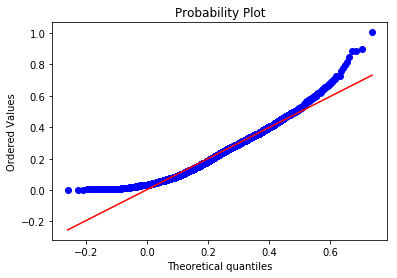

In [70]:
#第7列正态性检验
stats.probplot(data1[7],(data1[7].mean(),data1[7].std()),dist='norm',plot=plt)

In [71]:
#非正态分布数据，不能进行Z-Score标准化,线性回归不能用归一化。
#第8列数据的正态性分析

((array([-1.63808313, -0.87014157, -0.44641342, ..., 20.31378234,
         20.73751049, 21.50545205]),
  array([ 1,  2,  3, ..., 27, 27, 29], dtype=int64)),
 (0.9654881314317221, 0.3428300125696815, 0.9648470373671635))

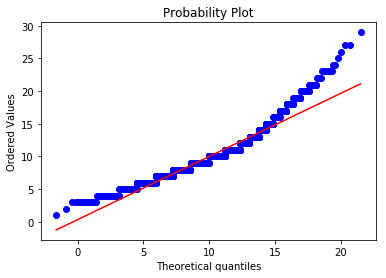

In [72]:
stats.probplot(data1[8],(data1[8].mean(),data1[8].std()),dist='norm',plot=plt)

In [73]:
#近似正态，但不十分。这样的数据通常要进行广义幂变换cox-Box变换。

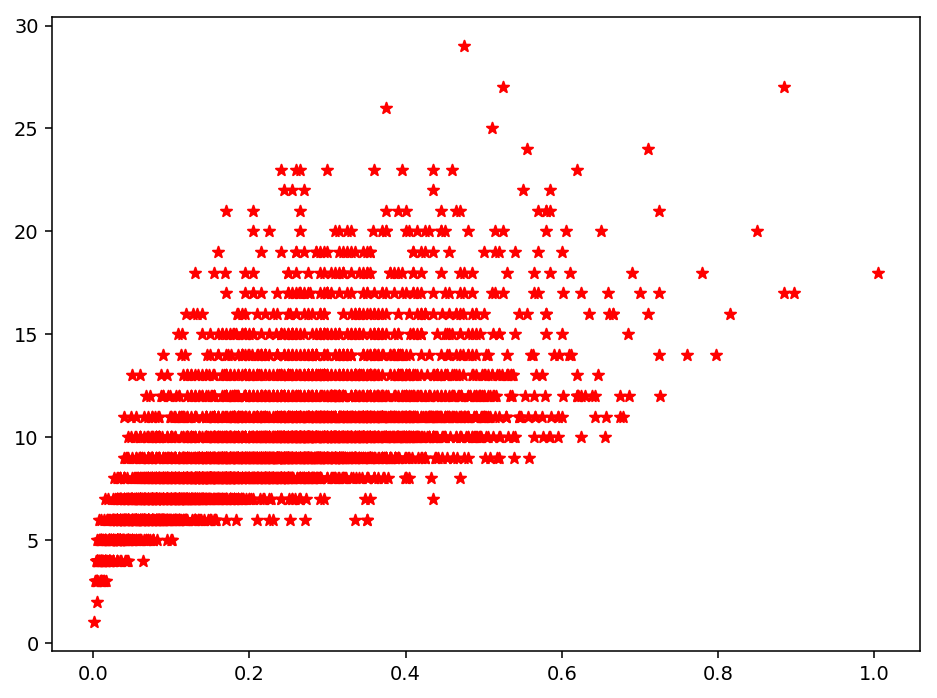

In [2]:
#绘制散点图
asdf,wert=plt.subplots(1,1,figsize=(8,6),dpi=140)
wert.scatter(data1[7],data1[8],c='r',marker='*')

In [3]:
def matrix_generator(X,n):
    return np.column_stack((X,X**n,np.log(X)))

In [4]:
def matrix_generator_1(X,n):
    return np.column_stack((np.ones(len(X)),X,X**n,np.log(X)))

In [5]:
def OLS_function(X,y):#X是数据集，y是目标集
    data_matrix=np.column_stack((np.ones(len(X)),X))
    if np.abs(linalg.det(data_matrix.T@data_matrix))<10**(-14):
        return 'No Solution'
    return linalg.inv(data_matrix.T@data_matrix)@(data_matrix.T@y)

In [7]:
X1=matrix_generator(data1[7],3)
Y1=data1[8].values
OLS_function(X1,Y1)

array([11.09002147,  5.76945483,  2.4435698 ,  1.55852633])

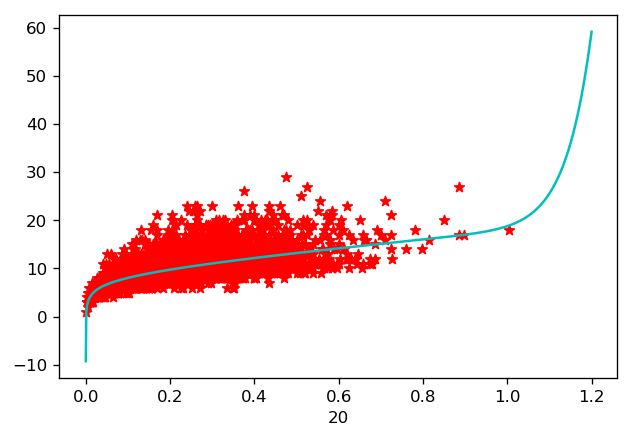

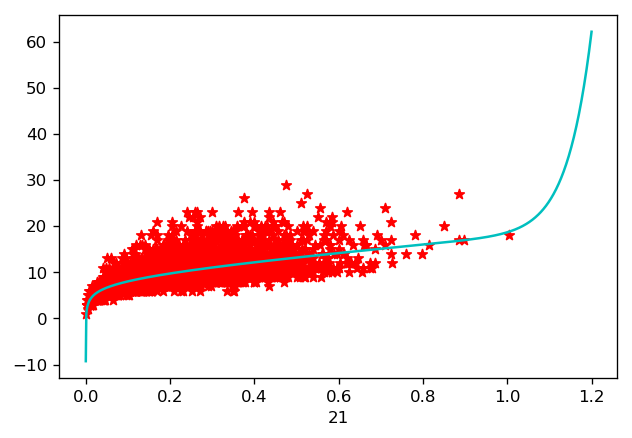

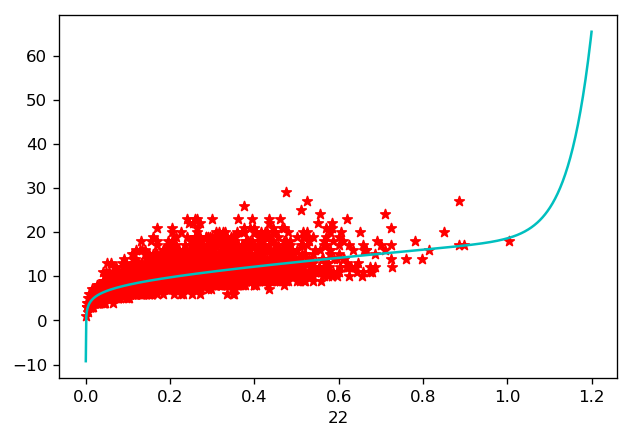

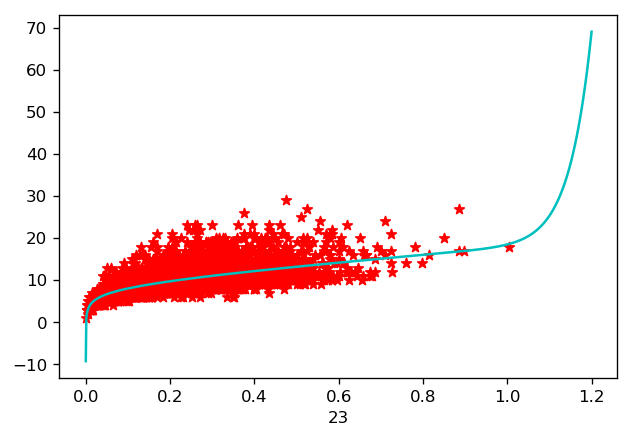

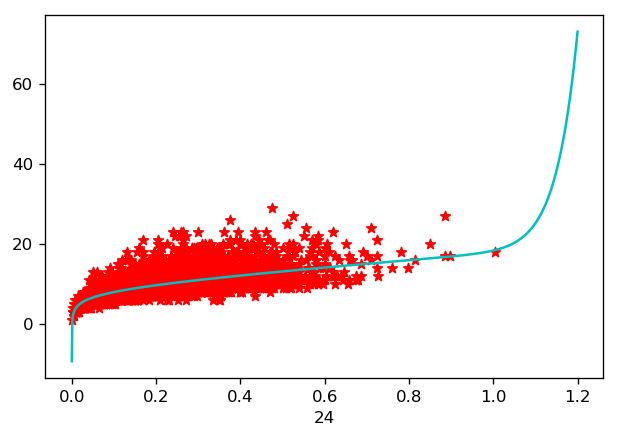

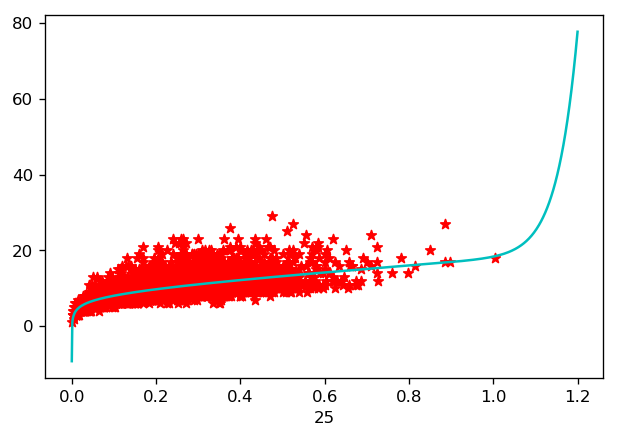

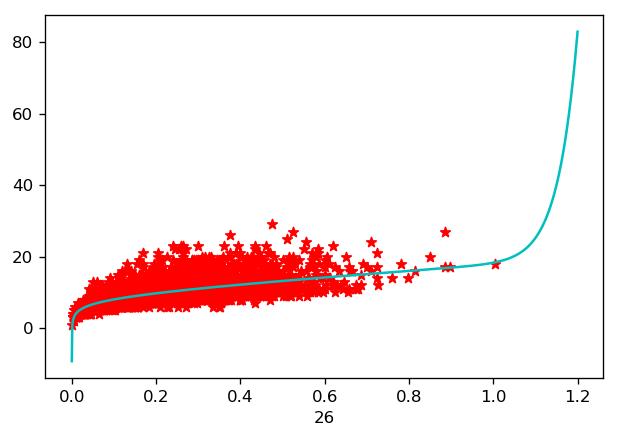

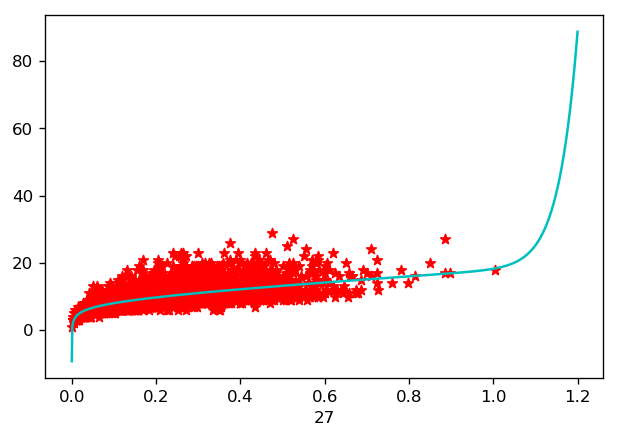

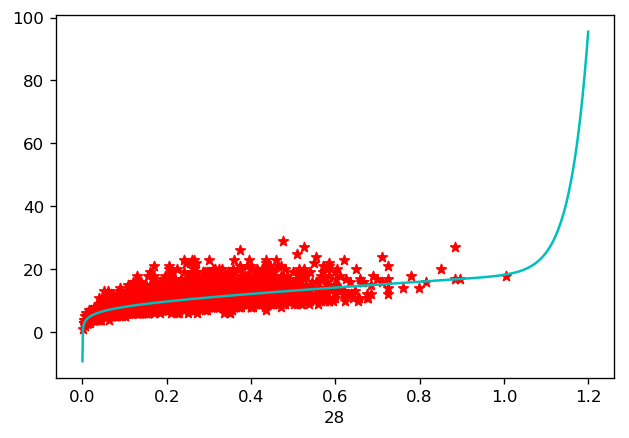

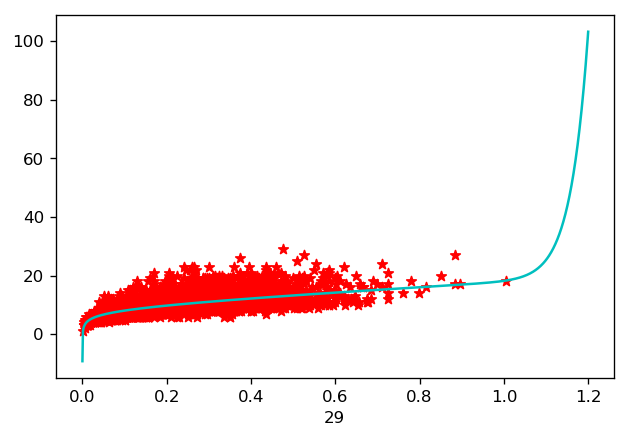

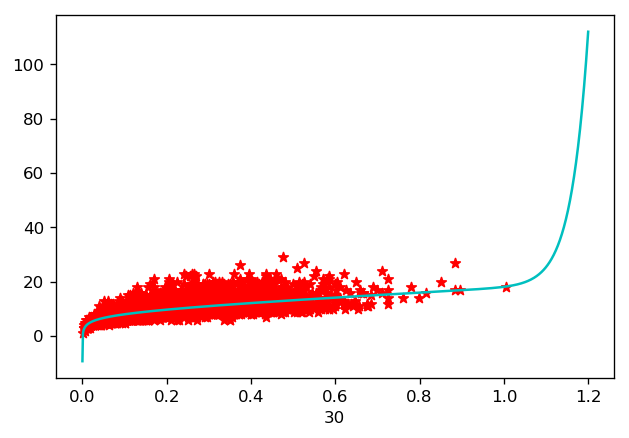

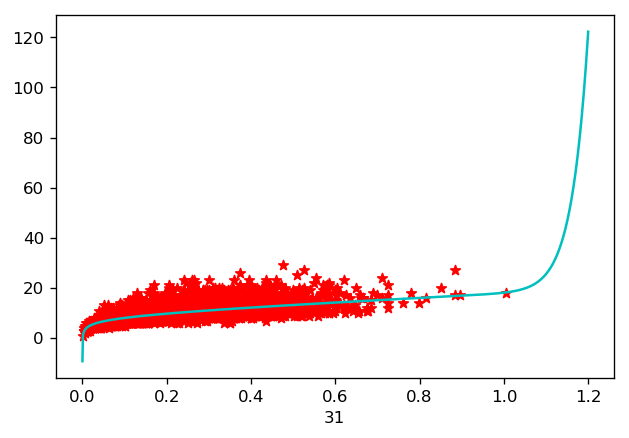

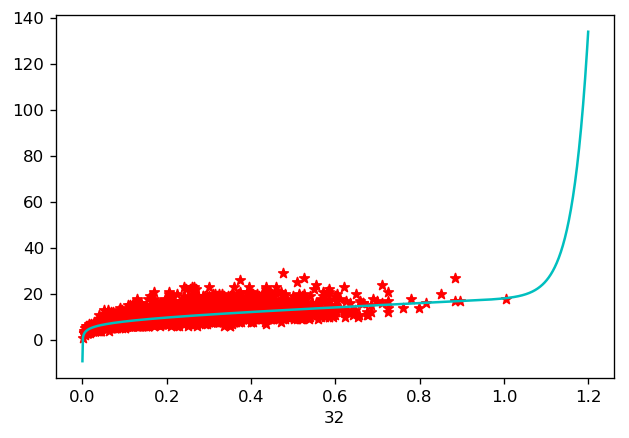

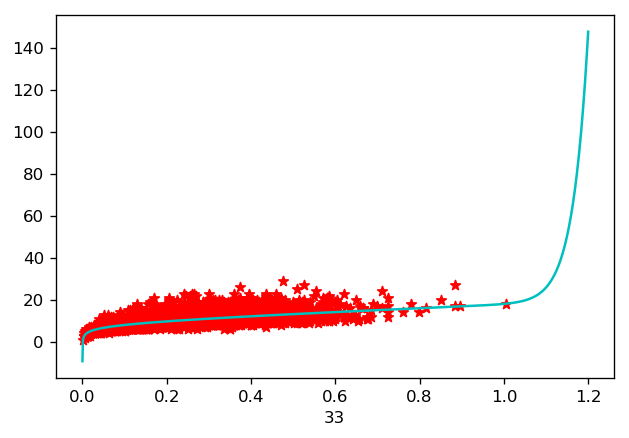

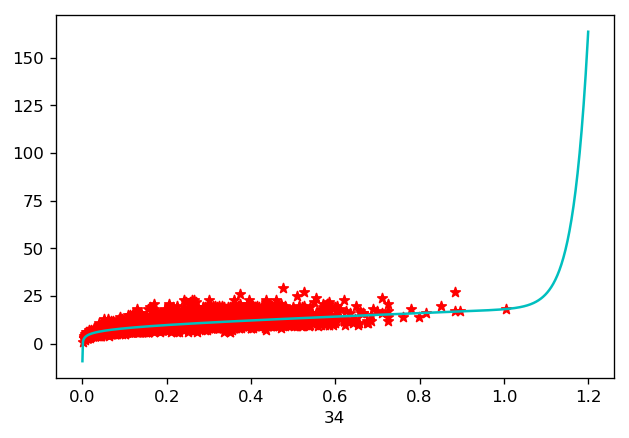

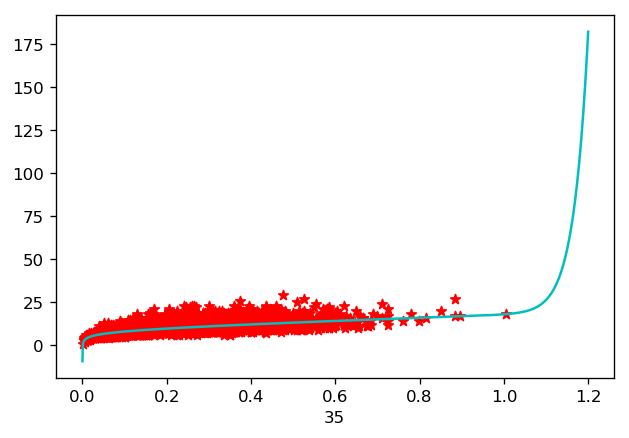

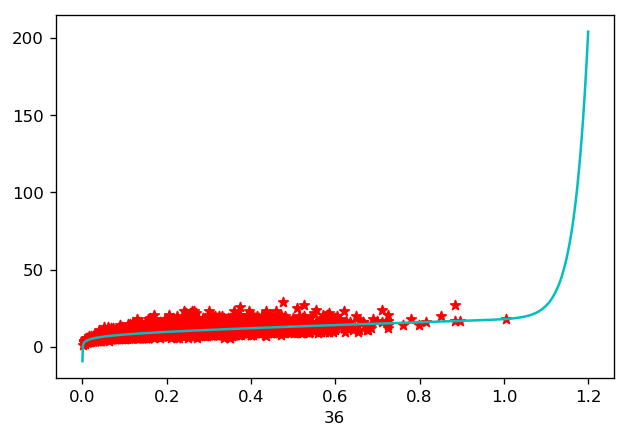

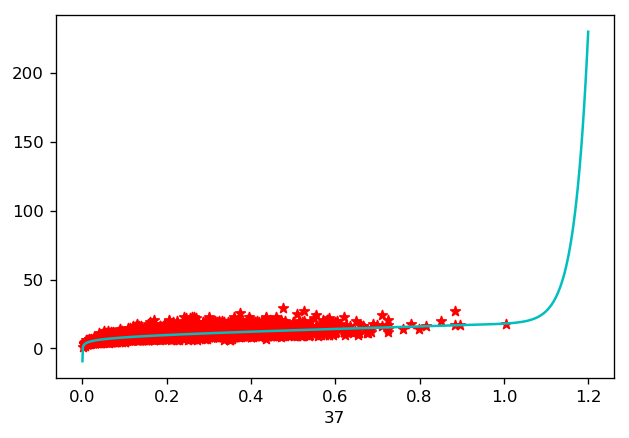

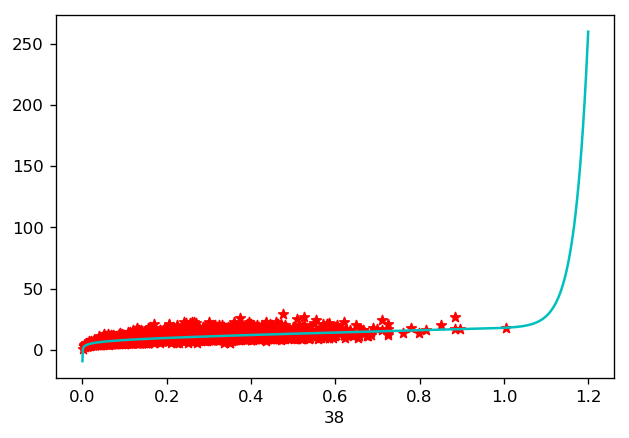

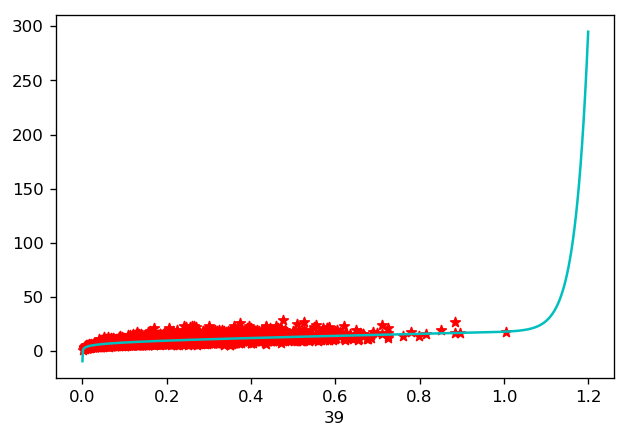

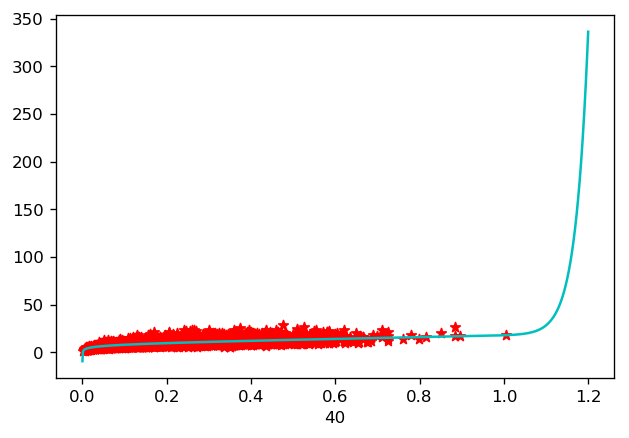

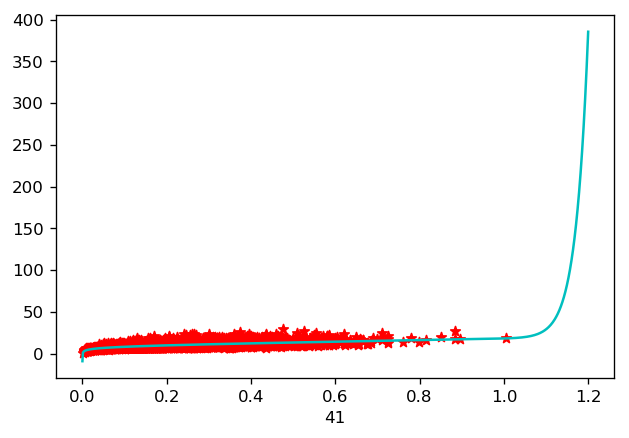

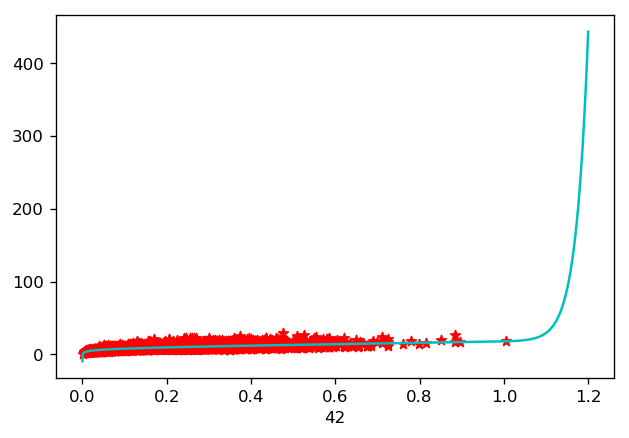

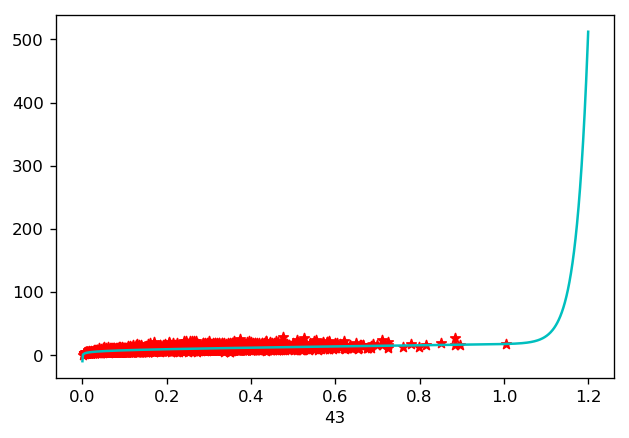

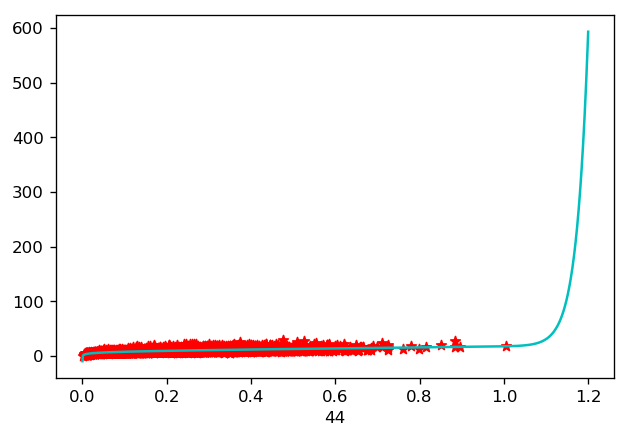

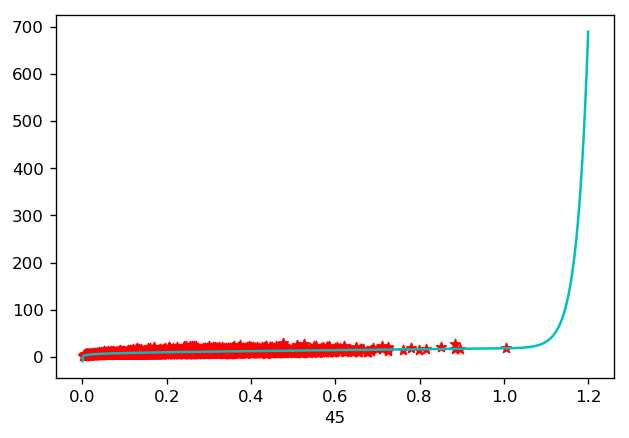

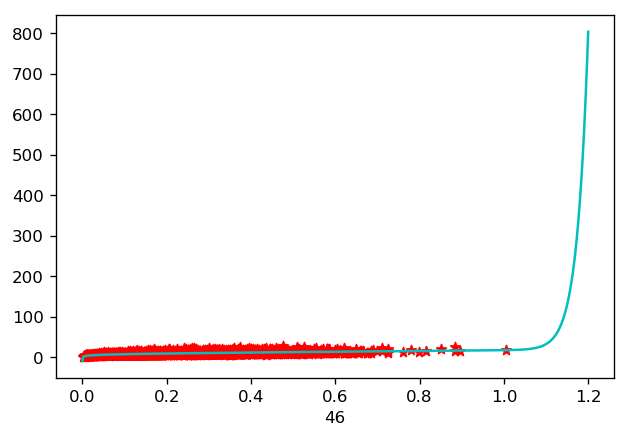

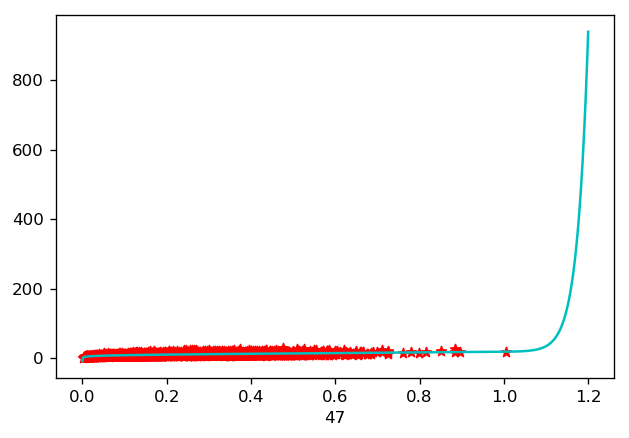

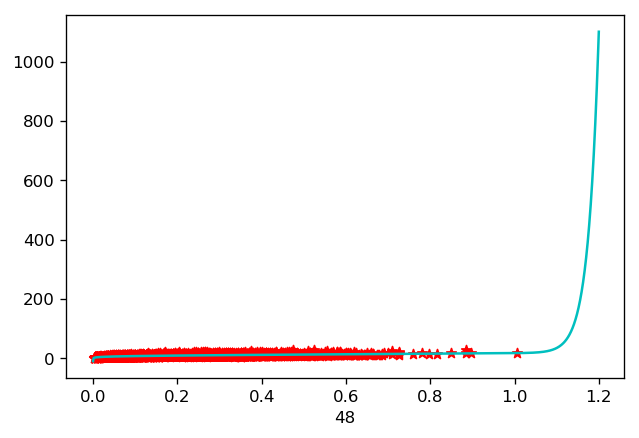

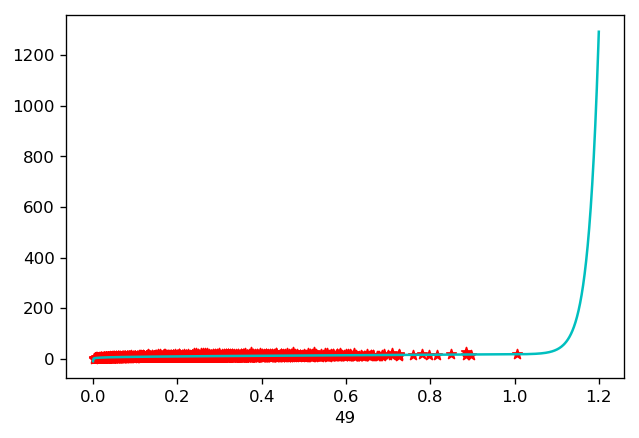

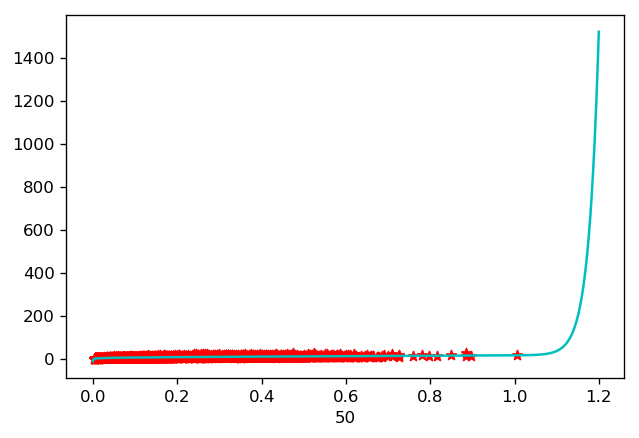

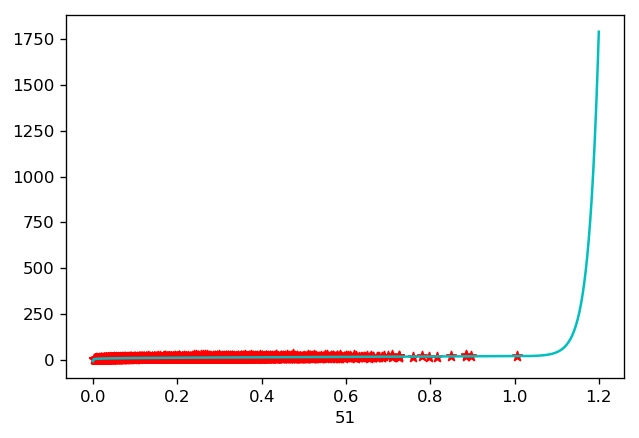

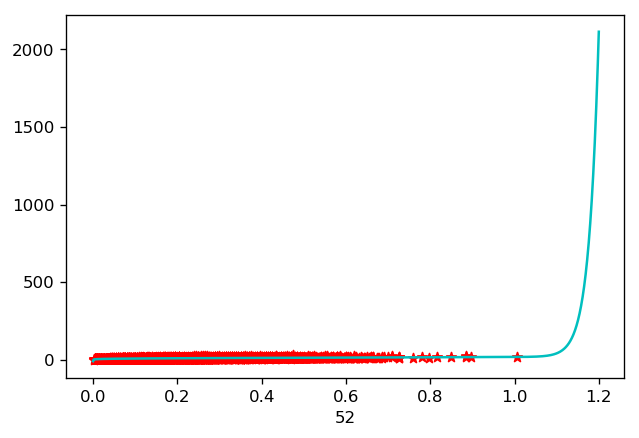

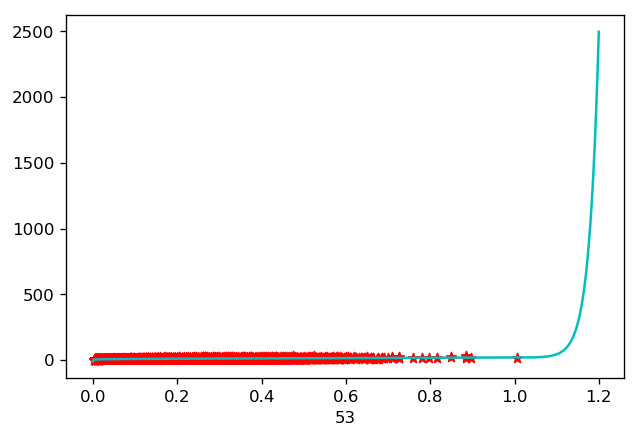

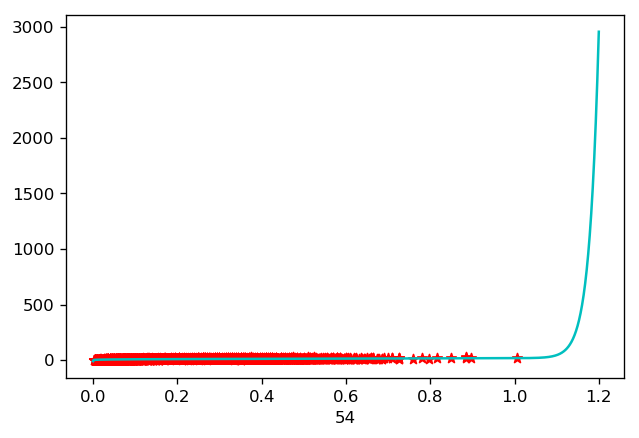

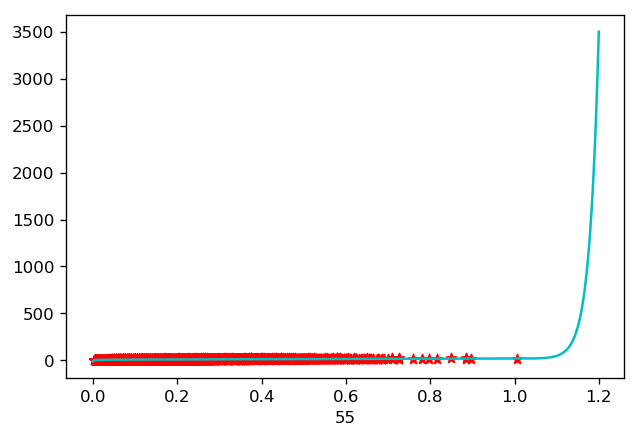

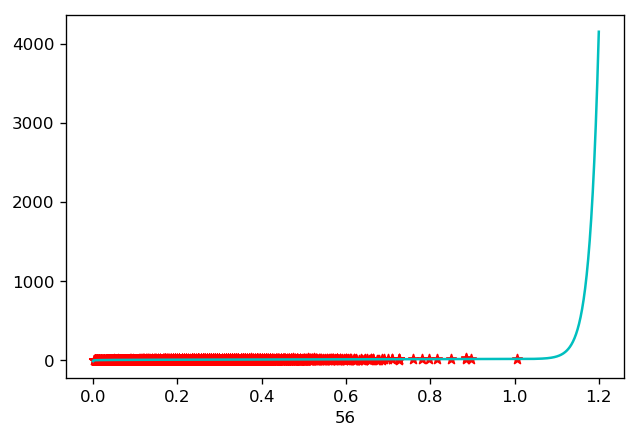

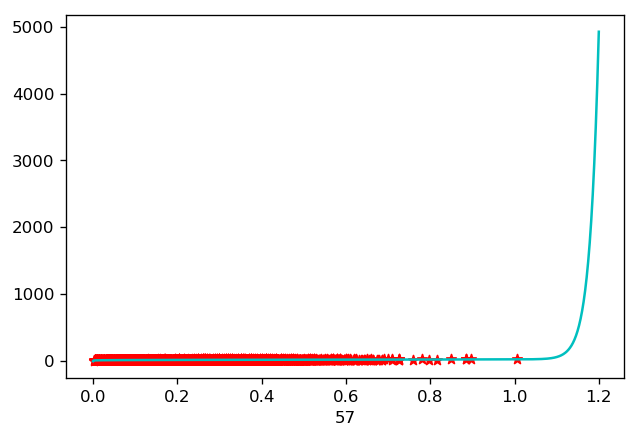

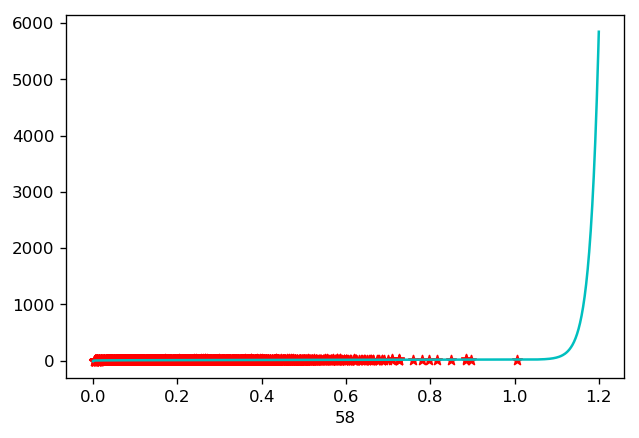

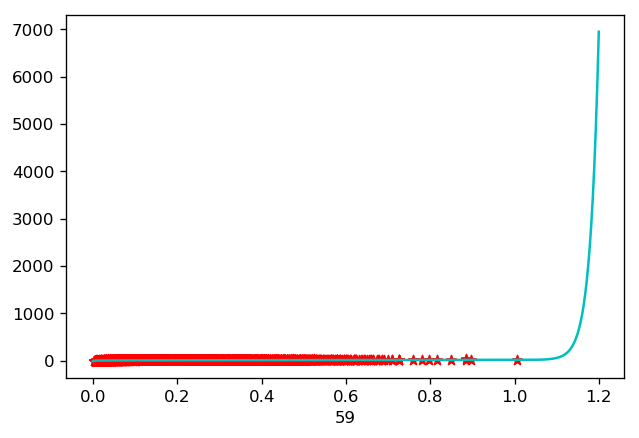

In [9]:
Xdata=np.linspace(0.000001,1.2,1000)#进行区间分割，分割而成数据用来生成回归线
Y1=data1[8].values#我们目标集合，用来计算我们的系数
for j in range(20,60):
    sed,axes12=plt.subplots(1,1,figsize=(6,4),dpi=120)
    axes12.scatter(data1[7],data1[8],c='r',marker='*')#散点图
    X1=matrix_generator(data1[7],j)#生成我们的数据集，用来计算我们的回归系数
    ar_dic=OLS_function(X1,Y1)#产生回归系数
    #print(ar_dic)
    if type(ar_dic)==str:
        continue
    Xdata_mat=matrix_generator_1(Xdata,j)#产生数据矩阵，用户计算回归线
    Y_huigui=Xdata_mat@ar_dic#产生生成回归线的目标集
    #print(Y_huigui)
    axes12.plot(Xdata,Y_huigui,'-c')
    axes12.set_xlabel(str(j))